In [1]:
import pandas as pd
import leveldb
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = leveldb.LevelDB('./user_db')
total = 0
for k,v in db.RangeIter():
    total += 1
print total

1857


In [3]:
ur_sts = []
total = 0
for k,v in db.RangeIter():
    u = json.loads(v)
    for s in u['Stats']:
        if s['Season'] == '2017-pre4' and s['Region'] == 'as' and s['Match'] == 'squad':
            ur_st = s['Stats']
            ur_vals = {}
            for v in ur_st:
                ur_vals[v['field']] = float(v['value'])
            ur_sts.append(ur_vals)
user_df = pd.DataFrame(ur_sts)

In [4]:
filter_too_high_kda = []
for u in ur_sts:
    if u['KillDeathRatio'] > 10.0:
        continue
    else:
        filter_too_high_kda.append(u)
filter_df = pd.DataFrame(filter_too_high_kda, columns=['Rating', 'KillDeathRatio', 'DamagePg', 'MoveDistancePg' ])
filter_df.columns.values

array(['Rating', 'KillDeathRatio', 'DamagePg', 'MoveDistancePg'], dtype=object)

In [5]:
filter_df[['Rating','KillDeathRatio','DamagePg']]

,Rating,KillDeathRatio,DamagePg
0,2229.0,3.42,391.36
1,2674.0,7.71,507.32
2,2266.0,3.24,314.96
3,2227.0,0.85,118.67
4,2354.0,2.50,295.00
5,2350.0,2.41,269.50
6,2405.0,2.09,210.07
7,2272.0,2.22,278.36
8,2334.0,1.56,198.17
9,2364.0,0.85,130.92


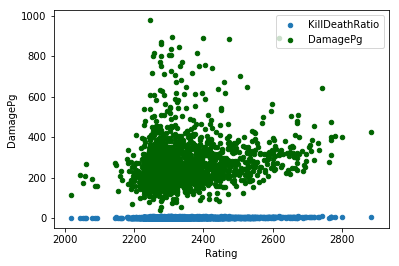

In [8]:
ax = filter_df.plot.scatter(x='Rating', y='KillDeathRatio', label='KillDeathRatio');
filter_df.plot.scatter(x='Rating', y='DamagePg', color='DarkGreen', label='DamagePg', ax=ax);